### 데이터 살펴보기

In [1]:
from os.path import join

import numpy  as np
import pandas as pd

### 데이터 불러오기 및 살펴보기

In [2]:
train_path = join('input', 'FIFA_train.csv')
test_path  = join('input', 'FIFA_test.csv')

train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)

In [3]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [4]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


---

#### 결측치 확인하기

In [6]:
import missingno as msno

<AxesSubplot:>

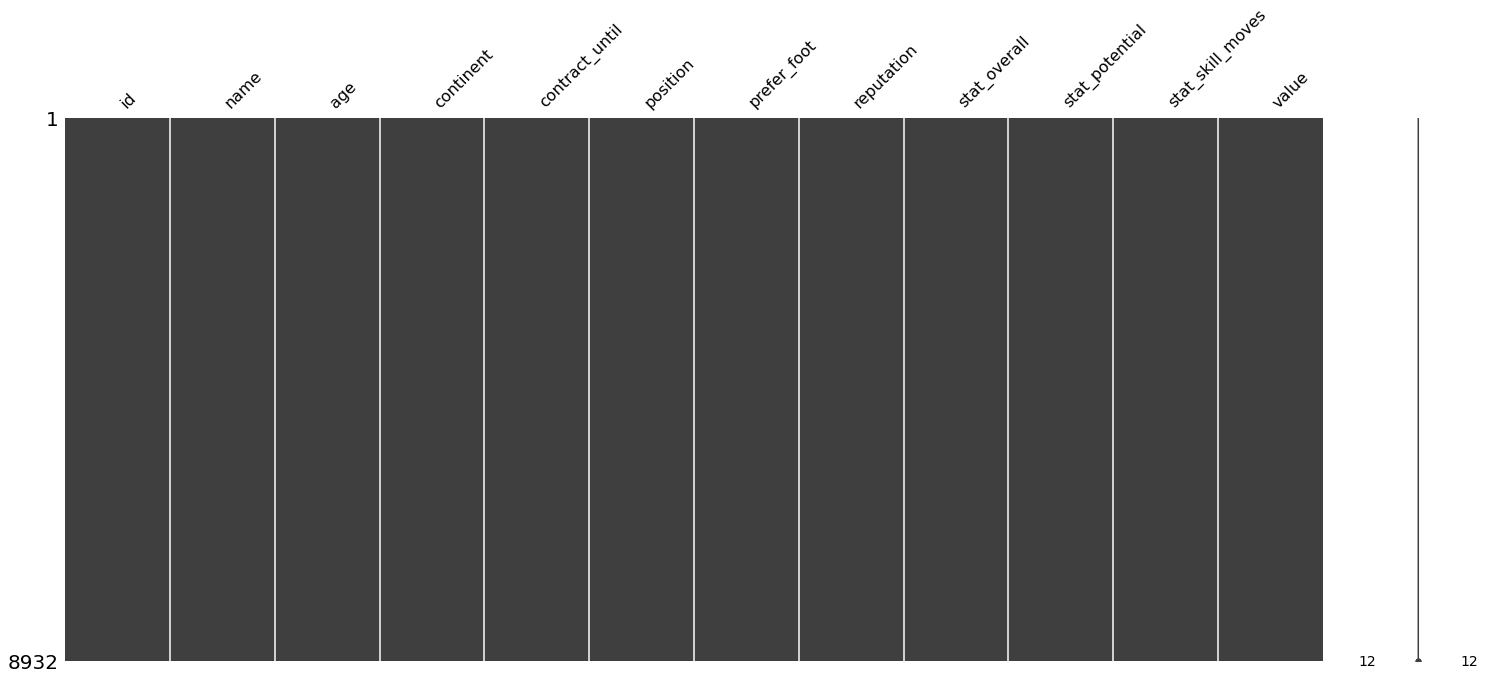

In [7]:
msno.matrix(train)

<AxesSubplot:>

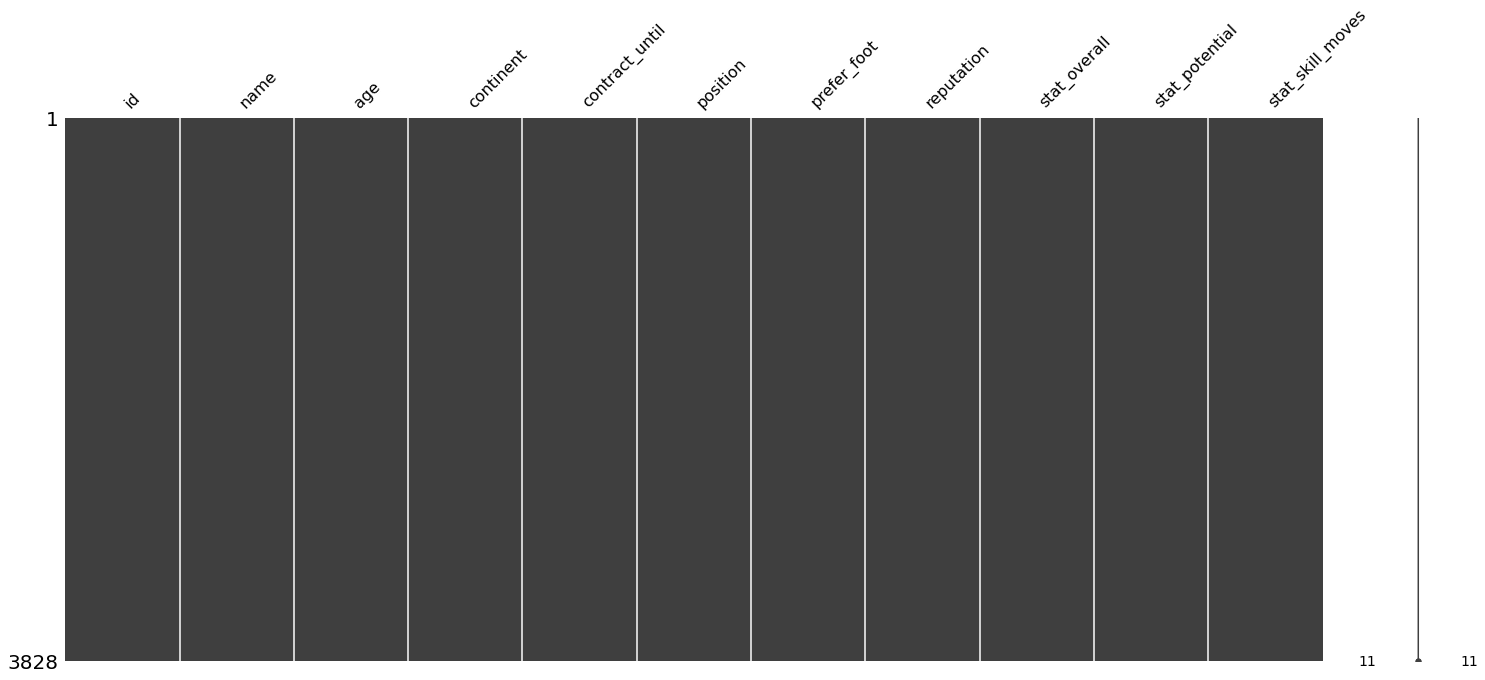

In [8]:
msno.matrix(test)

In [9]:
# pd.isna(train) : 각 데이터의 결측 유무 파악, .sum() : 개수 파악
pd.isna(train).sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [10]:
pd.isna(test).sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

#### 이상치 확인하기

In [11]:
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [12]:
test.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000
mean,7846.258098,25.297806,1.143939,67.336991,72.107628,2.414838
std,4870.339361,4.628236,0.448465,6.908814,6.133428,0.781153
min,1.000000,16.000000,1.000000,47.000000,52.000000,1.000000
25%,3466.250000,22.000000,1.000000,63.000000,68.000000,2.000000
50%,7643.500000,25.000000,1.000000,67.000000,72.000000,2.000000
75%,11967.000000,29.000000,1.000000,72.000000,76.000000,3.000000
max,16943.000000,42.000000,5.000000,94.000000,95.000000,5.000000


#### Unique 값을 확인하여 Train, Test에 동일한 범주가 있는지를 확인

In [13]:
cat_cols = ['continent', 'contract_until', 'position', 'prefer_foot']

In [14]:
for col in cat_cols : 
    print('{} \t: {}'.format(col, train[col].unique()))

continent 	: ['south america' 'europe' 'africa' 'asia' 'oceania']
contract_until 	: ['2021' '2020' '2019' '2023' '2022' '2024' 'Jun 30, 2019' '2026'
 'Dec 31, 2018' '2018' '2025' 'Jun 30, 2020' 'May 31, 2020' 'May 31, 2019'
 'Jan 31, 2019' 'Jan 1, 2019' 'Jan 12, 2019']
position 	: ['ST' 'GK' 'DF' 'MF']
prefer_foot 	: ['left' 'right']


In [15]:
for col in cat_cols : 
    print('{} \t: {}'.format(col, test[col].unique()))

continent 	: ['europe' 'south america' 'africa' 'asia' 'oceania']
contract_until 	: ['2022' '2023' '2020' '2021' 'Jun 30, 2019' '2019' '2025' '2024' '2018'
 'May 31, 2020' 'Jun 30, 2020' 'May 31, 2019' 'Dec 31, 2019'
 'Dec 31, 2018' 'Jun 1, 2019' 'Jan 1, 2019' 'Jan 31, 2019' '2026']
position 	: ['ST' 'MF' 'DF' 'GK']
prefer_foot 	: ['right' 'left']


계약 시기를 나타내는 contract_until 변수에서 각 값들이 일정한 형태를 가지지 않는 경우를 찾을 수 있음

---
--- 

## 데이터 전처리

#### 수치형 변수 확인

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


<AxesSubplot:>

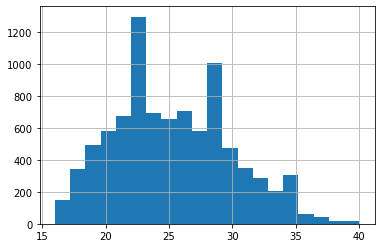

In [17]:
train['age'].hist(bins=20)

<AxesSubplot:>

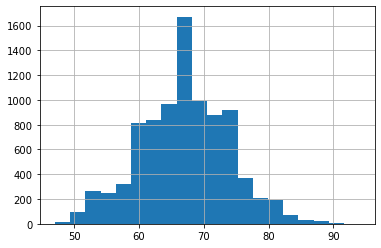

In [18]:
train['stat_overall'].hist(bins=20)

<AxesSubplot:>

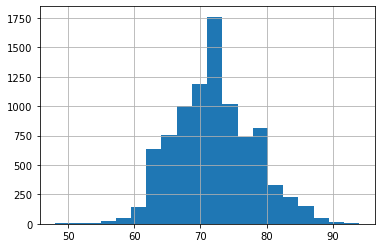

In [19]:
train['stat_potential'].hist(bins=20)

<AxesSubplot:>

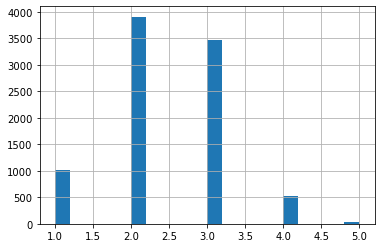

In [20]:
train['stat_skill_moves'].hist(bins=20)

대부분의 수치형 컬럼이 고르게 분포되어 있음을 확인할 수 있음

---

### 전처리

In [21]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [22]:
#label 분리 후 train에서 'value' 제거

label = train['value']
del train['value']

In [23]:
del_cols = ['id', 'name']

for col in del_cols : 
    del train[col]
    del test[col]
    
train['contract_until'] = train['contract_until'].map(lambda x : x[-4:])
test['contract_until']  = test['contract_until'].map(lambda x : x[-4:])

One-hot-Encoding을 하기 전에 불필요한 항목인 id, name 컬럼을 삭제 <br>
contract_until의 경우 위에서 살펴본 것 처럼 연도가 4자리로 표기되거나 4자리의 연도 앞의 월, 일이 들어간 케이스 들이 있으므로 뒤에서 4자리만 사용 <br>
contract_until data 형식 ['2021' '2020' '2019' '2023' '2022' '2024' 'Jun 30, 2019' '2026'
 'Dec 31, 2018' '2018' '2025' 'Jun 30, 2020' 'May 31, 2020' 'May 31, 2019'
 'Jan 31, 2019' 'Jan 1, 2019' 'Jan 12, 2019'] )

#### One-hot-Encoding

In [24]:
# train, test data를 합쳐주고 One-hot-Encoding 진행
tmp = pd.concat([train, test])
tmp = pd.get_dummies(tmp)
tmp.shape

(12760, 25)

In [25]:
# 다시 분리
train_val = tmp.iloc[:train.shape[0]]
test  = tmp.iloc[train.shape[0]:]

---
---

### Train 데이터를 Train, Validation 데이터로 나누기

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_val,
                                                  label,
                                                  test_size=0.3,
                                                  random_state=2019)

### Train 데이터로 학습하고, Valid 데이터로 검증하기

In [27]:
# 모델 불러오고
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=10,
                   n_estimators=200,
                   n_jobs=-1,
                   random_state=2019)

In [28]:
# 학습(훈련데이터)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=-1, num_parallel_tree=1,
             random_state=2019, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [29]:
#모델 검증하기
y_pred = xgb.predict(x_val)

In [30]:
# 모델 검증하기 (검증 데이터) R<sup>2</sup>
xgb.score(x_val, y_val)

0.9664538892255287

In [32]:
# 3_2) 모델 검증하기 (검증 데이터) MSE
from sklearn.metrics import mean_squared_error
print('XGB 회귀 모델 MSE {}'.format(mean_squared_error(y_val, y_pred)))

XGB 회귀 모델 MSE 1084022827310.5978


R<sup>2</sup>가 1에 가까운 값을 가졌으니, 훈련 데이터로 학습한 모델은 관찰하지 않은 데이터에 대해서도 괜찮은 성능을 보여줄 것으로 예상할 수 있음

----
----

### Cross Validation

In [35]:
from sklearn.model_selection import KFold

kf = KFold(5, shuffle=True, random_state=2019)

In [36]:
train_val.head()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,...,contract_until_2023,contract_until_2024,contract_until_2025,contract_until_2026,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,31,5.0,94,94,4.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,27,4.0,91,93,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,31,5.0,91,91,3.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,32,4.0,91,91,3.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,25,3.0,90,93,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [37]:
for i, (trn_idx, val_idx) in enumerate(kf.split(train_val, label)) : 
    x_trn, y_trn     = train_val.values[trn_idx], label.values.reshape((-1, 1))[trn_idx]
    x_valid, y_valid = train_val.values[val_idx], label.values.reshape((-1, 1))[val_idx]
    
    xgb = XGBRegressor(max_depth=10,
                   n_estimators=200,
                   objective='reg:squarederror',
                   n_jobs=-1,
                   random_state=2019)
    # ex) fold 1,2,3,4로 학습 
    xgb.fit(x_trn, y_trn)
    # ex) fold 5로 검증
    y_pred = xgb.predict(x_valid)
    
    print('fold {}, XGB 회귀 모델 MSE : {}'.format(i+1, mean_squared_error(y_valid, y_pred)))

fold 1, XGB 회귀 모델 MSE : 502474807953.1258
fold 2, XGB 회귀 모델 MSE : 529718859950.2332
fold 3, XGB 회귀 모델 MSE : 3091458033713.564
fold 4, XGB 회귀 모델 MSE : 301114201748.9777
fold 5, XGB 회귀 모델 MSE : 190596458279.20132


#### 보너스 앙상블 + 전처리 함수화

In [39]:
def preprocess(train, valid):
    # 계약 기간 컬럼에 들어있는 이상치 제거
    train['contract_until'] = train['contract_until'].map(lambda x : x[-4:])
    valid['contract_until'] = valid['contract_until'].map(lambda x : x[-4:])

    # 두개 합치고
    tmp = pd.concat([train, valid])
    # One-hot Encoding하고
    tmp = pd.get_dummies(tmp)

    # 다시 분리 (train&val, test)
    train = tmp.iloc[:train.shape[0]]
    valid = tmp.iloc[train.shape[0]:]
    
    return train, valid

In [40]:
train_val = pd.read_csv(train_path)

if 'value' in train_val.columns : 
    del train_val['value']

# 1. 필요없는 컬럼 제거
del_cols = ['id', 'name']

for col in del_cols : 
    del train_val[col]

In [41]:
results = list()

for i, (trn_idx, val_idx) in enumerate(kf.split(train_val, label)) : 
    x_trn, y_trn     = train_val.iloc[trn_idx], label.values.reshape((-1, 1))[trn_idx]
    x_valid, y_valid = train_val.iloc[val_idx], label.values.reshape((-1, 1))[val_idx]
    
    # fold 마다 전처리
    x_trn, x_valid = preprocess(x_trn, x_valid)
    
    xgb = XGBRegressor(max_depth=50,
                   n_estimators=300,
                   objective='reg:squarederror',
                   n_jobs=-1,
                   random_state=2019)
    # ex) fold 1,2,3,4로 학습 
    xgb.fit(x_trn, y_trn)
    # ex) fold 5로 검증
#     y_pred = xgb.predict(x_valid)
    
    results.append(xgb.predict(test))
#     print('fold {}, XGB 회귀 모델 MSE : {}'.format(i+1, mean_squared_error(y_valid, y_pred)))

<ipython-input-39-0350e194fc76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['contract_until'] = train['contract_until'].map(lambda x : x[-4:])
<ipython-input-39-0350e194fc76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['contract_until'] = valid['contract_until'].map(lambda x : x[-4:])


In [42]:
y_pred = np.mean(np.array(results), axis=0)
y_pred.shape

(3828,)

In [43]:
test.head()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,...,contract_until_2023,contract_until_2024,contract_until_2025,contract_until_2026,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,33,5.0,94,94,5.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,26,5.0,92,93,5.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,27,4.0,91,92,4.0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
3,27,4.0,91,91,4.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,32,4.0,91,91,4.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


##### Cross Validation Score

In [44]:
test = pd.read_csv(test_path)
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [62]:
result = pd.DataFrame(np.concatenate([test['id'].values.reshape((-1,1)), y_pred.reshape((-1,1))], axis=1))
result.columns = ['id', 'value']
result.head()

,id,value
0,1.0,69682480.0
1,2.0,77169504.0
2,4.0,74749560.0
3,5.0,77126528.0
4,6.0,63736372.0


In [64]:
result.to_csv('result.csv', index=False)